# Lab 1: Regression

Welcome to the advanced Machine Learning Course.

The objective of this lab session is to code a few regression algorithms and to apply them to synthetic and real data.

We begin with the standard imports:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

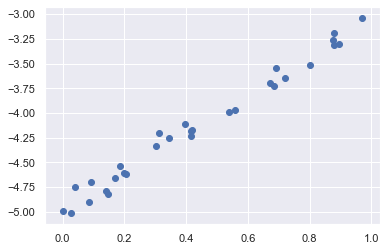

In [2]:
rng = np.random.RandomState(1)
x =  rng.rand(30)
y = 2 * x - 5 + 0.1* rng.randn(30)
plt.scatter(x, y);

Fill in the MultivariateLinearRegression class whose method fit takes a matrix $X$ and an array $y$ as input and returns an array of coefficients

In [3]:
class MultivariateLinearRegression():
    # Class for linear regression solving least-squares:

    def __init__(self,):
        self.coef_ = None
        
    def fit(self, X, y):
        """ Fit the data (X, y).
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        y: (num_sampes, ) np.array
            Output vector
        
        Note:
        -----
        Updates self.coef_
        """
        # TODO :
        # Create a (num_samples, num_features+1) np.array X_aug whose first column 
        # is a column of all ones (so as to fit an intercept).
        
        # Update self.coef_
        X_aug = np.c_[np.ones((X.shape[0],)),X]
        # Solution is explicit
        self.coef_ = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_aug.T,X_aug)),X_aug.T),y)
        
        
        
        
    def predict(self, X):
        """ Make predictions for data X.
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        
        Returns:
        -----
        y_pred: (num_samples, ) np.array
            Predictions
        """
        # TODO
        return np.matmul(np.c_[np.ones((X.shape[0],)),X],self.coef_)

In [4]:
x.shape, y.shape

((30,), (30,))

Try your model on the data and plot the data points and the fitted line:

In [5]:
# TODO
# Fitting model
mvlr = MultivariateLinearRegression()
mvlr.fit(x,y)

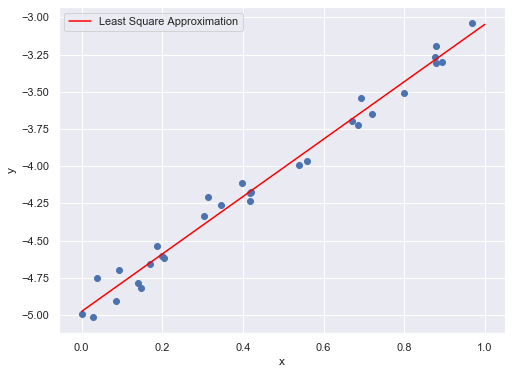

In [6]:
# Plotting prediction
x_pred = np.linspace(0,1,100)
y_pred = mvlr.coef_[0] + mvlr.coef_[1] * x_pred

plt.figure(figsize=(8,6))
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_pred,y_pred,'-r',c='Red',label='Least Square Approximation')
plt.legend(loc='upper left')
plt.show()

Print the scope and the intercept:

In [7]:
print("Model slope: {}".format(mvlr.coef_[1]))
print("Model intercept: {}".format(mvlr.coef_[0]))

Model slope: 1.9292055341290535
Model intercept: -4.976046835178196


We see that the results are very close to the inputs, as we might hope.

Of course our linear regression estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building a toy example:

In [8]:
rng = np.random.RandomState(1)
X = 3 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model = MultivariateLinearRegression()
model.fit(X, y)
print(model.coef_) # perfect fitting

[ 0.5  1.5 -2.   1. ]


Here the $y$ data is constructed from three random $x$ values, and the linear regression recovers the coefficients used to construct the data.

In this way, we fit lines, planes, or hyperplanes to our data.
It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.

## Basis Function Regression

One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.

The idea is to take our multidimensional linear model:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

### Polynomial basis functions

This polynomial projection is useful enough that it is built into Scikit-Learn, using the ``PolynomialFeatures`` transformer:

In [9]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(5, include_bias=False) # with or without intercept
poly_transform = poly.fit_transform(x[:, None])

We see here that the transformer has converted our one-dimensional array into a two-dimensional array by taking the exponent of each value.
This new, higher-dimensional data representation can then be plugged into a linear regression

With this transform, we can use the linear model to fit much more complicated relationships between $x$ and $y$. 
For example, here is a sine wave with noise:

In [10]:
rng = np.random.RandomState(1)
x = rng.rand(50)
y = 2 * np.sin(1.8*np.pi*x) + 0.1 * rng.randn(50)

# TODO
poly = PolynomialFeatures(10, include_bias=False)
poly_transform = poly.fit_transform(x[:,None])

In [11]:
poly_transform.shape

(50, 10)

In [12]:
models = []
for i in range(1,11):
    mvlr = MultivariateLinearRegression()
    mvlr.fit(poly_transform[:,:i],y)
    models.append(mvlr)

In [13]:
x_pred = np.linspace(0,1,200)
poly_pred = PolynomialFeatures(10,include_bias=False)
poly_transform_pred = poly.fit_transform(x_pred[:,None])

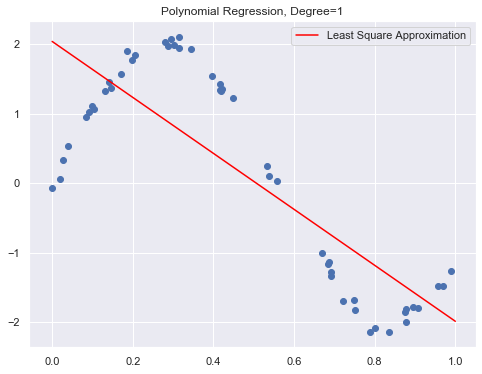

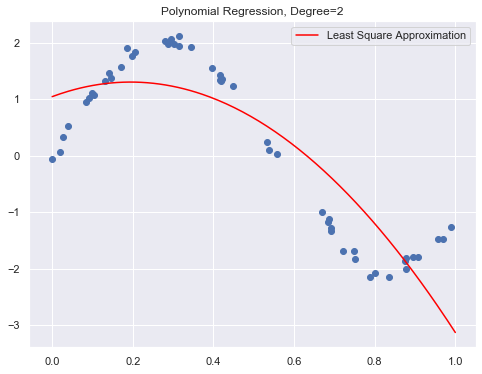

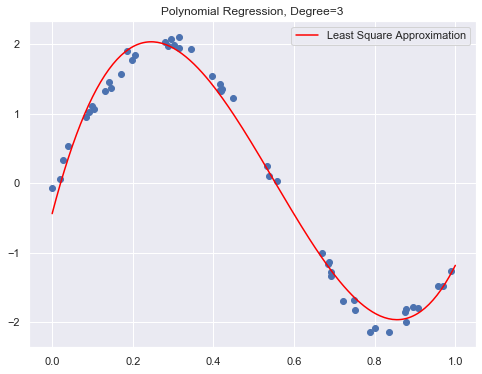

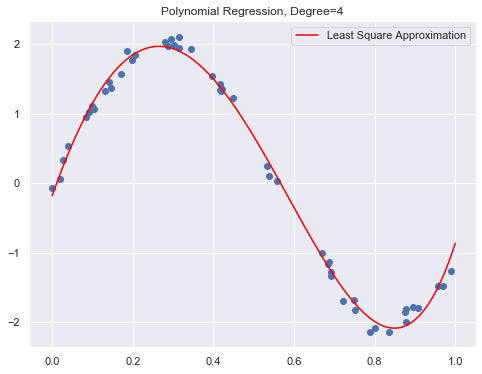

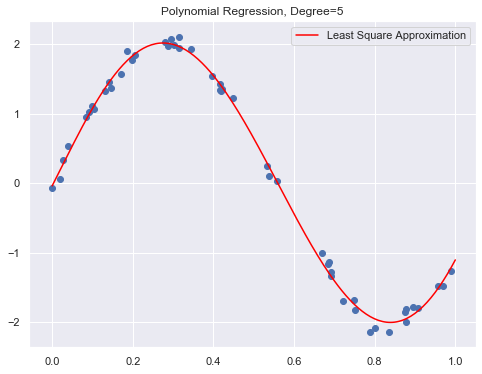

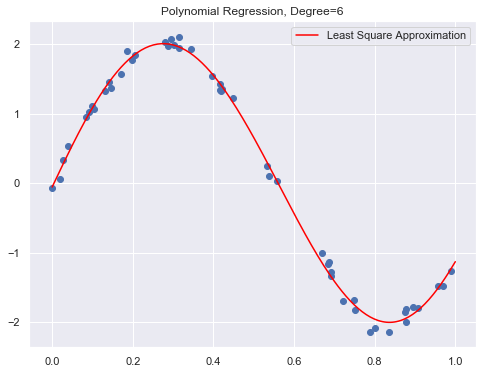

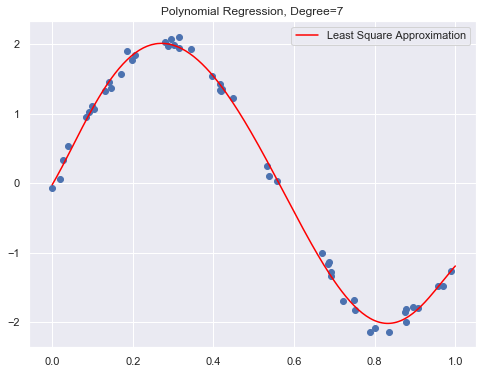

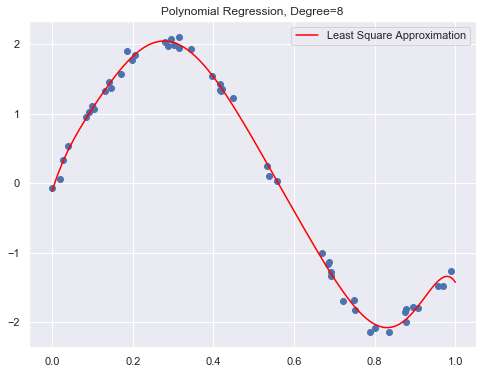

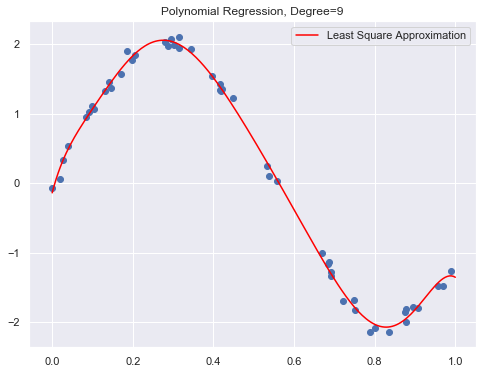

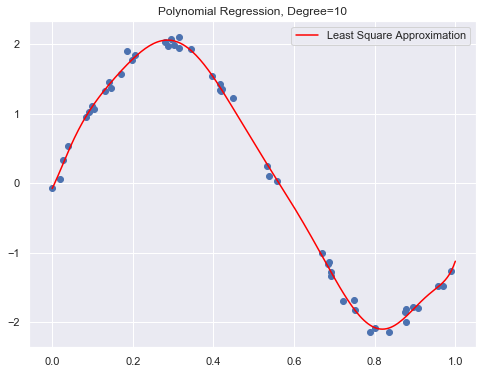

In [14]:
for i in range(10):
    plt.figure(figsize=(8,6))
    plt.title('Polynomial Regression, Degree={}'.format(i+1))
    plt.scatter(x,y)
    y_pred = models[i].predict(poly_transform_pred[:,:i+1])
    plt.plot(x_pred,y_pred,c='Red',label='Least Square Approximation')
    plt.legend(loc='upper right')
    plt.show()

Try with different maximum degrees. Our linear model can provide an excellent fit to this non-linear data!

**Bonus:** How can we avoid overfitting?

**Answer:** There are two main possibilities to avoid overfitting. \
First, avoid using high polynomial degrees to approximate the distribution. Indeed, the simplest models are the most explainable and high degree polynomials are able to approximate precisely each point of a distribution (Lagrange Polynomials). \
Second, use regularization.

## Regularization

The introduction of basis functions into our linear regression makes the model much more flexible, but it also can very quickly lead to over-fitting.

With the data projected to the 30-dimensional basis, the model has far too much flexibility and goes to extreme values between locations where it is constrained by data.
We can see the reason for this if we plot the coefficients of the Gaussian bases with respect to their locations:

### Ridge regression ($L_2$ Regularization)

Perhaps the most common form of regularization is known as *ridge regression* or $L_2$ *regularization*, sometimes also called *Tikhonov regularization*.
This proceeds by penalizing the sum of squares (2-norms) of the model coefficients; in this case, the penalty on the model fit would be 
$$
P = \alpha\sum_{n=1}^N \theta_n^2
$$
where $\alpha$ is a free parameter that controls the strength of the penalty.

 Fill in the following class:

In [15]:
class RidgeRegularization():
    # Class for ridge regression with closed form equation:

    def __init__(self, alpha):
        self.coef_ = None
        self.alpha_ = alpha
        
    def fit(self, X, y):
        """ Fit the data (X, y).
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        y: (num_sampes, ) np.array
            Output vector
        
        Note:
        -----
        Updates self.coef_
        """
        # TODO:
        # Create a (num_samples, num_features+1) np.array X_aug whose first column 
        # is a column of all ones (so as to fit an intercept).
        
        # Update self.coef_ adding the shrinkage ridge term
        X_aug = np.c_[np.ones((X.shape[0],)),X]
        # Solution is explicit
        self.coef_ = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_aug.T,X_aug) + self.alpha_ * np.identity(X_aug.shape[1])),X_aug.T),y)
        
        
    def predict(self, X):
        """ Make predictions for data X.
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        
        Returns:
        -----
        y_pred: (num_samples, ) np.array
            Predictions
        """
        # TODO
        return np.matmul(np.c_[np.ones((X.shape[0],)),X],self.coef_)

Try the model in our data. Plot the coefficients of the regression.

In [16]:
# TODO
rng = np.random.RandomState(1)
x =  rng.rand(30)
y = 2 * x - 5 + 0.1* rng.randn(30)

In [17]:
alpha_vals = [0,.001,.01,.1,1,10]
models = []

In [18]:
for alpha in alpha_vals:
    ridge = RidgeRegularization(alpha)
    ridge.fit(x,y)
    models.append(ridge)

In [19]:
x_pred = np.linspace(0,1,100)

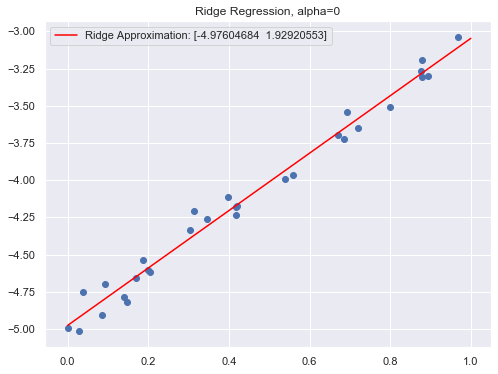

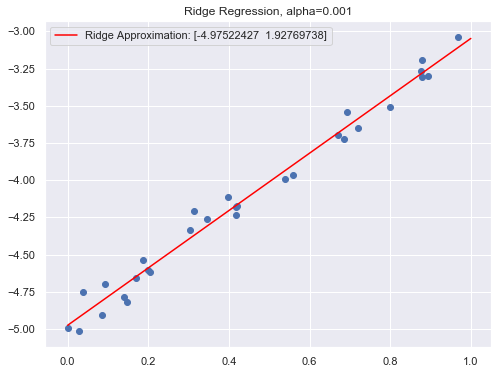

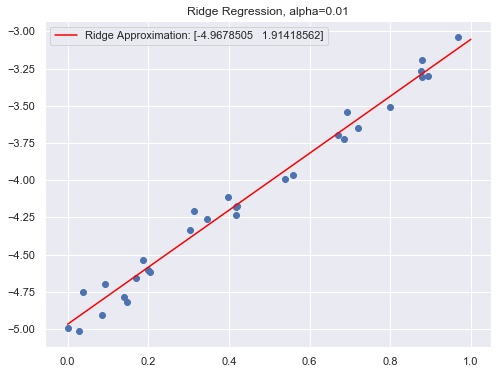

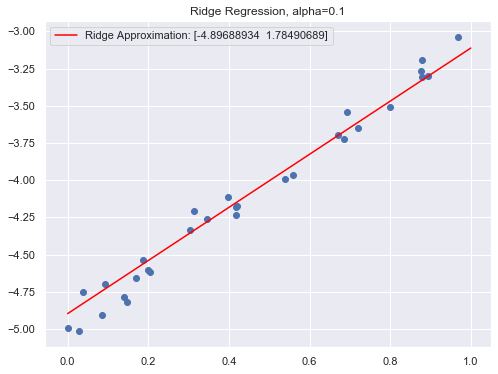

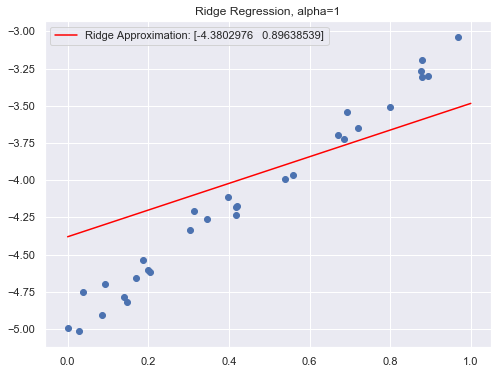

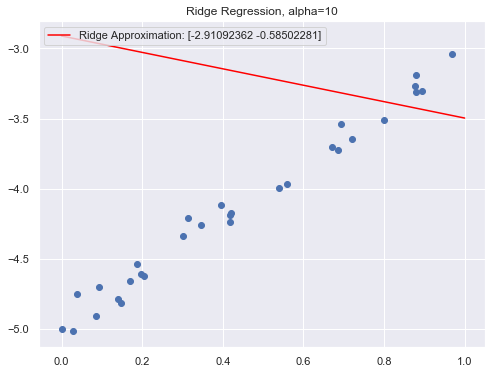

In [20]:
for i in range(len(alpha_vals)):
    model = models[i]
    y_pred = model.predict(x_pred)
    plt.figure(figsize=(8,6))
    plt.scatter(x,y)
    plt.plot(x_pred,y_pred,c='Red',label='Ridge Approximation: {}'.format(model.coef_))
    plt.legend(loc='upper left')
    plt.title('Ridge Regression, alpha={}'.format(alpha_vals[i]))
    plt.show()

The $\alpha$ parameter is essentially a knob controlling the complexity of the resulting model.
In the limit $\alpha \to 0$, we recover the standard linear regression result; in the limit $\alpha \to \infty$, all model responses will be suppressed.

**Bonus:** How can we choose the $\alpha$ parameter?

**Answer:** We can plot the mean squared error of the estimation with regards to the value of $\alpha$ and consider:
$$ \alpha_{opt} = argmin_{\alpha}MeanSquaredError_{\alpha}(\beta) $$

### Lasso regression ($L_1$ Regularization)

Another very common type of regularization is known as lasso, and involves penalizing the sum of absolute values (1-norms) of regression coefficients: $$
P = \alpha\sum_{n=1}^N |\theta_n|
$$ Though this is conceptually very similar to ridge regression, the results can differ surprisingly: for example, due to geometric reasons lasso regression tends to favor sparse models where possible: that is, it preferentially sets model coefficients to exactly zero.

We can see this behavior in duplicating the ridge regression figure, but using L1-normalized coefficients.

First, fill in the following class:

In [21]:
class LassoRegularization():
    # Class for lasso regression with soft thresholding:

    def __init__(self, alpha, learning_rate=0.01, iterations=1000):
        self.coef_ = None
        self.alpha = alpha
        self.learning_rate_ = learning_rate
        self.iterations_ = iterations

    def soft_threshold(self, beta):
        """ Soft threshold function"""
        #TODO
        """
        Computes soft threshold of input array beta with threshold alpha * learning_rate.
        """
        threshold = self.alpha * self.learning_rate_
        for i in range(beta.size):
            if beta[i] < -threshold:
                beta[i] = beta[i] + threshold
            elif abs(beta[i]) <= threshold:
                beta[i] = 0
            else:
                beta[i] = beta[i] - threshold
        return beta
        
    def fit(self, X, y):
        """ Fit the data (X, y).
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        y: (num_sampes, ) np.array
            Output vector
        
        Note:
        -----
        Updates self.coef_
        """
        # TODO:
        # Update self.coef_ by using the coordinate soft thresholding algorithm
        learning_rate = self.learning_rate_
        iterations = self.iterations_
        X_aug = np.c_[np.ones((X.shape[0],)),X]
        # Initializing coefs at 0
        self.coef_ = np.zeros((X_aug.shape[1],))
        
        # Updating coefficients at each iteration
        for i in range(iterations):
            grad_desc = self.coef_ + learning_rate * np.matmul(X_aug.T, y - np.matmul(X_aug,self.coef_))
            self.coef_ = self.soft_threshold(grad_desc)
        
        

    def predict(self, X):
        """ Make predictions for data X.
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        
        Returns:
        -----
        y_pred: (num_samples, ) np.array
            Predictions
        """
        # TODO
        return np.matmul(np.c_[np.ones((X.shape[0],)),X],self.coef_)

Try the model in our data. Plot the coefficients of the regression and compare them to the Ridge's coefficients.

In [22]:
# TODO
rng = np.random.RandomState(1)
x =  rng.rand(30)
y = 2 * x - 5 + 0.1* rng.randn(30)

In [23]:
alpha_vals = [0,.001,.01,.1,1,10]
models = []

In [24]:
for alpha in alpha_vals:
    lasso = LassoRegularization(alpha)
    lasso.fit(x,y)
    models.append(lasso)

In [25]:
x_pred = np.linspace(0,1,100)

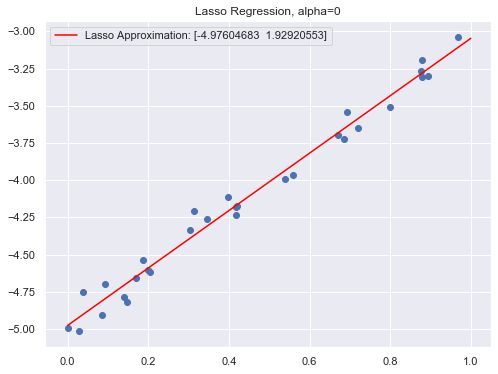

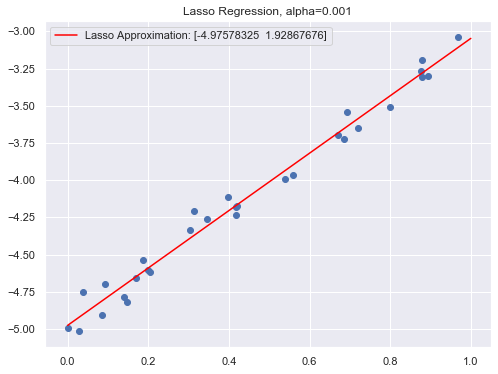

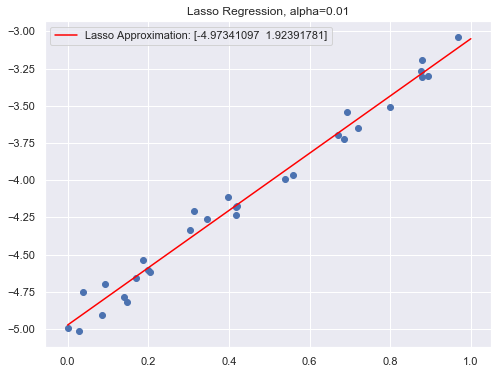

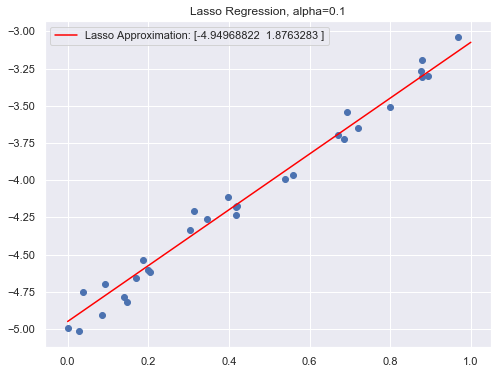

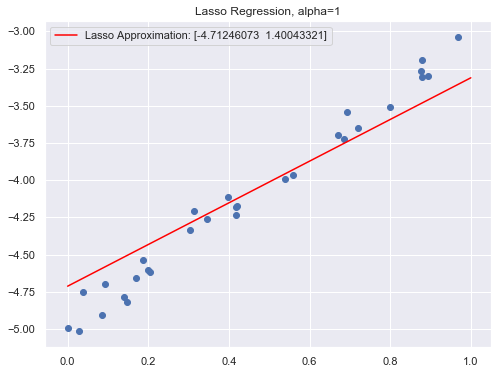

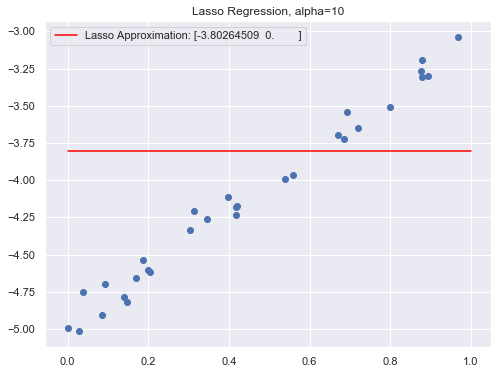

In [26]:
for i in range(len(alpha_vals)):
    model = models[i]
    y_pred = model.predict(x_pred)
    plt.figure(figsize=(8,6))
    plt.scatter(x,y)
    plt.plot(x_pred,y_pred,c='Red',label='Lasso Approximation: {}'.format(model.coef_))
    plt.legend(loc='upper left')
    plt.title('Lasso Regression, alpha={}'.format(alpha_vals[i]))
    plt.show()

Lasso's estimation seems more stable than Ridge's as $\alpha$ increases. For instance, the distribution is relatively well fit when $\alpha = 0.1$ which comes from the quadratic nature of Ridge's regularization compared to the linear one of Lasso.

## Robust regression

Linear least-squares estimates can behave badly when the error distribution is not normal, particularly when
the errors are heavy-tailed. One remedy is to remove influential observations from the least-squares fit. Another approach, termed robust regression, is to employ a fitting criterion that is not as vulnerable as least squares to unusual data.

The most common general method of robust regression is M-estimation, introduced by Huber (1964).

Fill in the following class:

Let us first compute the weight functions of Huber and Bisquare potentials:

$\underline{Huber Method:}$
$$\rho(e) = \left\{\begin{array}{ll}
 \frac{e^{2}}{2} & \mbox{ if $\lvert e \rvert \leq \delta$}\\
 \delta \lvert e \rvert - \frac{\delta^{2}}{2} & \mbox{ if $\lvert e \rvert > \delta$}
 \end{array}\right.$$
 Thus:
$$w(e) = \frac{\dot{\rho(e)}}{e} = \left\{\begin{array}{ll}
 1 & \mbox{ if $\lvert e \rvert \leq \delta$}\\
 \frac{\delta}{e} & \mbox{ if $\lvert e \rvert > \delta$}
 \end{array}\right.$$

$\underline{Bisquare Method:}$
$$\rho(e) = \left\{\begin{array}{ll}
 \frac{\delta^{2}}{6}(1-(1-\frac{e^{2}}{\delta^{2}})^{3}) & \mbox{ if $\lvert e \rvert \leq \delta$}\\
 \frac{\delta^{2}}{6} & \mbox{ if $\lvert e \rvert > \delta$}
 \end{array}\right.$$
 Thus:
$$w(e) = \frac{\dot{\rho(e)}}{e} = \left\{\begin{array}{ll}
 (1-(\frac{e}{\delta})^{2})^{2} & \mbox{ if $\lvert e \rvert \leq \delta$}\\
 0 & \mbox{ if $\lvert e \rvert > \delta$}
 \end{array}\right.$$

In [27]:
import scipy

In [28]:
class RobustRegression():
    # Class for robust linear regression:

    def __init__(self, potential, k, eps=.1):
        self.coef_ = None
        self.potential_ = potential
        self.k_ = k
        # Attribute used to determine convergence of the IRLS
        self.eps_ = eps
        
    def mad(self, x):
        """ Calculate mad."""
        #TODO
        mad_clmns = scipy.stats.median_absolute_deviation(x)
        return np.linalg.norm(mad_clmns)
        
        
    def weight_function(self, x):
        """ Calculate weigth of point residual x.
    
        Parameters:
        -----------
        x: standarize by mad residual
        potential: name of the potential to use:
         "huber" or "bisquare"
        k: parameter of the potential function
        
        Returns:
        -----
        weight: weight corresponding to x 
        """
        #TODO
        potential = self.potential_
        k = self.k_
        mad = self.mad(x)
        
        # Standardizing x by mad residual
        x = x / mad
        
        # Applying weight function
        weight = np.zeros((x.size,))
        # Computing weight with regards to potential function
        if potential == 'huber':
            for i in range(x.size):
                if abs(x[i]) <= k:
                    weight[i] = 1
                else:
                    weight[i] = k / x[i]
        elif potential == 'bisquare':
            for i in range(x.size):
                if abs(x[i]) <= k:
                    weigth[i] = (1-(x[i]/k)**2)**2
                else:
                    weight[i] = 0
        else:
            raise ValueError("potential must take its value in ['huber','bisquare']")
            
        return np.diagflat(weight)
    
    def fit(self, X, y):
        """ Fit the data (X, y).
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        y: (num_sampes, ) np.array
            Output vector
        
        Note:
        -----
        Updates self.coef_
        """
        #TODO:
        
        # Create a (num_samples, num_features+1) np.array X_aug whose first column 
        # is a column of all ones (so as to fit an intercept).
        
        # Start with initial coefficients 

        # Iteratively update coefficients by weighted least-squares until convergence
        eps = self.eps_
        X_aug = np.c_[np.ones((X.shape[0],)),X]
        # Initializing coefs at 0
        self.coef_ = np.zeros((X_aug.shape[1],))
        # Iterate until convergence (convergence is reached when coefficients vary less than epsilon)
        converge = False
        while not converge:
            # Compute weight matrix
            weight = self.weight_function(y - np.matmul(X_aug, self.coef_))
            # Compute new coefficients and expect a non invertible matrix error
            coef = np.matmul(np.matmul(np.matmul(np.linalg.inv(np.matmul(np.matmul(X_aug.T,weight),X_aug)),X_aug.T),weight),y)
            # Test for convergence
            if np.linalg.norm(coef - self.coef_) < eps:
                converge = True
            # Update coefficients
            self.coef_ = coef
        
        
    def predict(self, X):
        """ Make predictions for data X.
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        
        Returns:
        -----
        y_pred: (num_samples, ) np.array
            Predictions
        """
        #TODO
        return np.matmul(np.c_[np.ones((X.shape[0],)),X],self.coef_)

Try it in the following data with outliers coming from the heavy-tail error and compare with the performance of the other models:

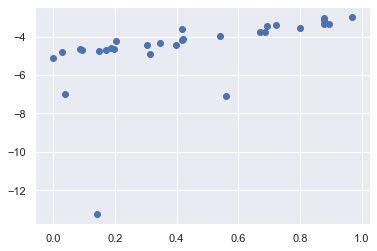

In [29]:
np.random.seed(300)
rng = np.random.RandomState(1)
x =  rng.rand(30)
y = 2 * x - 5 + 0.1* np.random.standard_cauchy(30)
plt.scatter(x, y);

###### 1) Robust Regression

In [30]:
import itertools

In [31]:
k_vals = [.001,.01,.1,1]
potential_vals = ['huber','bisquare']
par_vals = list(itertools.product(k_vals, potential_vals))

In [32]:
models = []

In [33]:
for k,potential in par_vals:
    rr = RobustRegression(potential,k)
    try:
        rr.fit(x,y)
    except:
        rr = None
    models.append(rr)

In [34]:
x_pred = np.linspace(0,1,100)

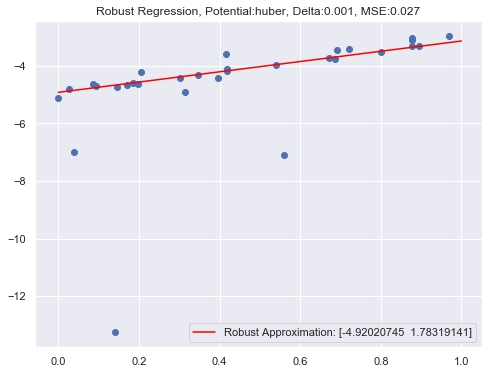

Model with parameters: 0.001 and bisquare could not be computed because of a non-invertible matrix.


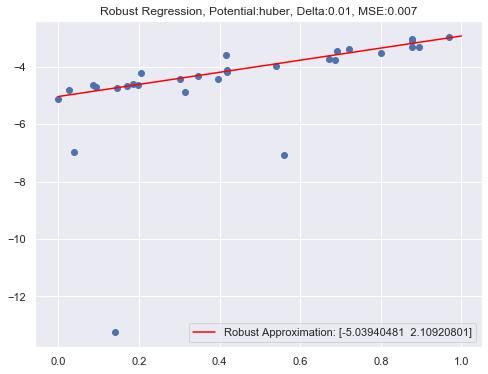

Model with parameters: 0.01 and bisquare could not be computed because of a non-invertible matrix.


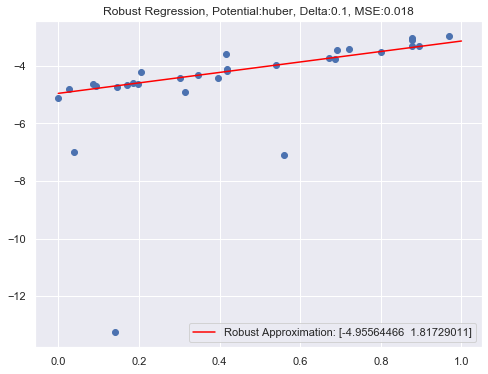

Model with parameters: 0.1 and bisquare could not be computed because of a non-invertible matrix.


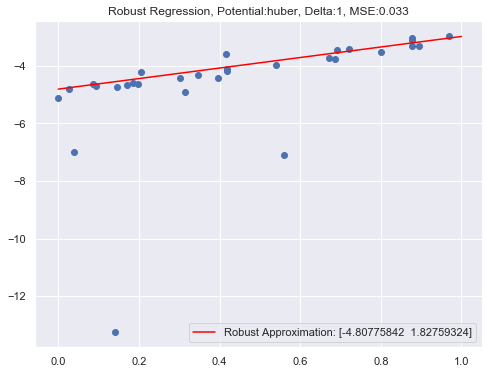

Model with parameters: 1 and bisquare could not be computed because of a non-invertible matrix.


In [35]:
for i in range(len(models)):
    if models[i] == None:
        print('Model with parameters: {} and {} could not be computed because of a non-invertible matrix.'.format(par_vals[i][0], par_vals[i][1]))
    else:
        model = models[i]
        y_pred = model.predict(x_pred)
        plt.figure(figsize=(8,6))
        plt.scatter(x,y)
        plt.plot(x_pred,y_pred,c='Red',label='Robust Approximation: {}'.format(model.coef_))
        plt.legend(loc='lower right')
        mse = round(np.mean((model.coef_ - np.array([-5,2]))**2)*1000)/1000
        plt.title('Robust Regression, Potential:{}, Delta:{}, MSE:{}'.format(model.potential_,model.k_,mse))
        plt.show()

##### 2) Multivariate Linear Regression

In [36]:
mvlr = MultivariateLinearRegression()
mvlr.fit(x,y)

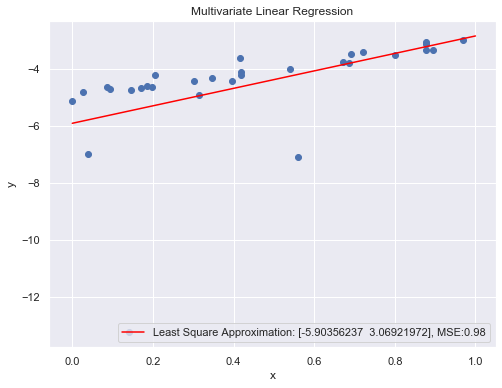

In [37]:
# Plotting prediction
x_pred = np.linspace(0,1,100)
y_pred = mvlr.coef_[0] + mvlr.coef_[1] * x_pred

plt.figure(figsize=(8,6))
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
mse = round(np.mean((mvlr.coef_ - np.array([-5,2]))**2)*1000)/1000
plt.plot(x_pred,y_pred,'-r',c='Red',label='Least Square Approximation: {}, MSE:{}'.format(mvlr.coef_, mse))
plt.title('Multivariate Linear Regression')
plt.legend(loc='lower right')
plt.show()

##### 3) Ridge Regression

In [38]:
alpha_vals = [.001,.01,.1]
models = []

In [39]:
for alpha in alpha_vals:
    ridge = RidgeRegularization(alpha)
    ridge.fit(x,y)
    models.append(ridge)

In [40]:
x_pred = np.linspace(0,1,100)

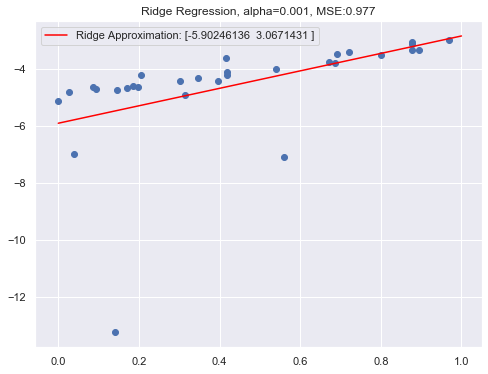

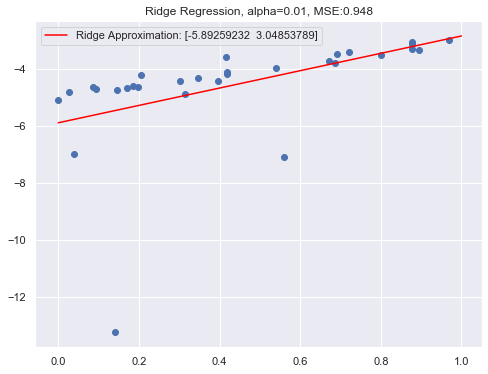

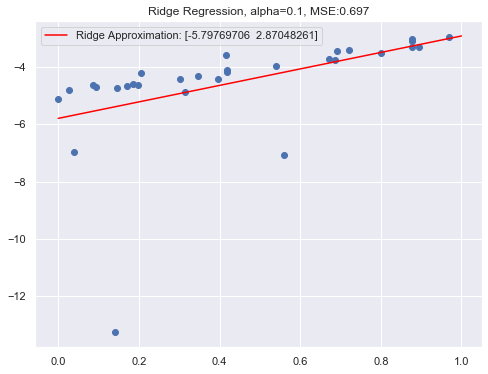

In [41]:
for i in range(len(alpha_vals)):
    model = models[i]
    y_pred = model.predict(x_pred)
    plt.figure(figsize=(8,6))
    plt.scatter(x,y)
    plt.plot(x_pred,y_pred,c='Red',label='Ridge Approximation: {}'.format(model.coef_))
    plt.legend(loc='upper left')
    mse = round(np.mean((model.coef_ - np.array([-5,2]))**2)*1000)/1000
    plt.title('Ridge Regression, alpha={}, MSE:{}'.format(alpha_vals[i],mse))
    plt.show()

##### 4) Lasso Regression

In [42]:
alpha_vals = [.001,.01,.1]
models = []

In [43]:
for alpha in alpha_vals:
    lasso = LassoRegularization(alpha)
    lasso.fit(x,y)
    models.append(lasso)

In [44]:
x_pred = np.linspace(0,1,100)

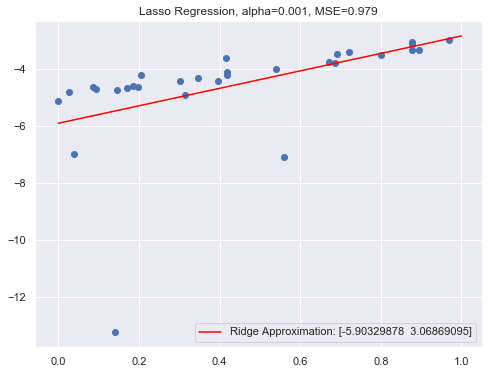

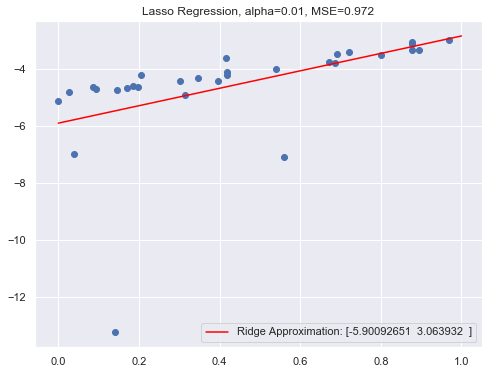

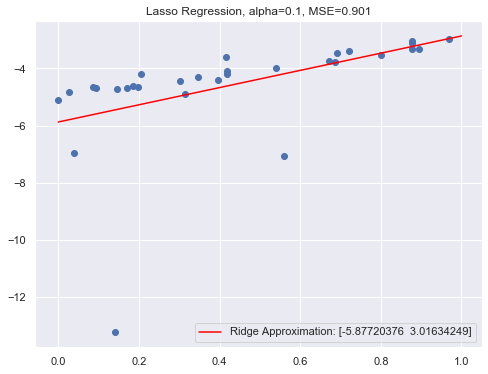

In [45]:
for i in range(len(alpha_vals)):
    model = models[i]
    y_pred = model.predict(x_pred)
    plt.figure(figsize=(8,6))
    plt.scatter(x,y)
    plt.plot(x_pred,y_pred,c='Red',label='Ridge Approximation: {}'.format(model.coef_))
    plt.legend(loc='lower right')
    mse = round(np.mean((model.coef_ - np.array([-5,2]))**2)*1000)/1000
    plt.title('Lasso Regression, alpha={}, MSE={}'.format(alpha_vals[i],mse))
    plt.show()

As expected, the robust regression is much more robust to outliers. Indeed, all other methods estimate the intercept around -6 and the slope around 3 which means the outliers had a strong influence on the value of the parameters. \
The best performing model was obtained with a Robust Regression with Huber potential and hyper-parameter value 0.01 reaching a mean squared error of:
$$ MSE_{RobustRegression}(huber,\delta=0.01)=0.007 $$

## Bonus: Predicting Bicycle Traffic

As an example, let's take a look at whether we can predict the number of bicycle trips across Seattle's Fremont Bridge based on weather, season, and other factors.

In this section, we joined the bike data with another dataset, and try to determine the extent to which weather and seasonal factors—temperature, precipitation, and daylight hours—affect the volume of bicycle traffic through this corridor.

As you may now, we should use time series techniques to analyze this dataset, instead, as a first simple approach, we will perform a multivariate linear regression to relate weather and other information to bicycle counts, in order to estimate how a change in any one of these parameters affects the number of riders on a given day.

Let's start by loading the dataset:

In [46]:
import pandas as pd
daily = pd.read_csv('data.csv', index_col='Date', parse_dates=True)

In [47]:
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.000000,13.35,1,0.000000
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.000000,13.60,1,0.002740
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.000000,15.30,1,0.005479
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.000000,15.85,1,0.008219
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.000000,15.85,1,0.010959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-28,2653.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13.418591,0.019685,19.45,0,2.901370
2015-08-29,699.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.362212,1.279528,17.75,0,2.904110
2015-08-30,1213.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.305611,0.401575,16.40,0,2.906849


With this in place, we can choose the columns to use, and fit a linear regression model to our data:

In [48]:
# TODO:
# Drop any rows with null values
daily = daily.dropna()

In [49]:
# Apply the previous algorithms to fit the number of bicycles
y = daily['Total'].to_numpy()
x = daily[['Mon','Tue','Wed','Thu','Fri','Sat','Sun','holiday','daylight_hrs','PRCP','Temp (C)','dry day','annual']].to_numpy()

In [50]:
x.shape, y.shape

((1064, 13), (1064,))

In [51]:
# Save it in the daily dataframe in a 'predicted' column

###### 1) Robust Regression

In [52]:
k = 0.01
potential = 'huber'

In [53]:
try:
    rr = RobustRegression(potential,k)
    rr.fit(x,y)
except:
    print('Non-invertible Matrix stopped the algorithm.')

Non-invertible Matrix stopped the algorithm.


Unfortunately the robust regression cannot be applied to this dataset because it generates non-invertible matrices.

##### 2) Multivariate Linear Regression

In [54]:
mvlr = MultivariateLinearRegression()
mvlr.fit(x,y)

In [63]:
# Computing MSE
y_pred = mvlr.predict(x)
print('MSE: {}'.format(np.linalg.norm(y-y_pred)))

MSE: 318205.6524097198


MSE in this case is terrible, model does not fit well.

##### 3) Ridge Regression

In [67]:
alpha_vals = [.001,.01,.1]
models = []

In [68]:
for alpha in alpha_vals:
    ridge = RidgeRegularization(alpha)
    ridge.fit(x,y)
    models.append(ridge)
    y_pred = ridge.predict(x)
    print('Model alpha={} with MSE:{}'.format(alpha,np.linalg.norm(y-y_pred)))

Model alpha=0.001 with MSE:14863.396489329038
Model alpha=0.01 with MSE:14863.396800813922
Model alpha=0.1 with MSE:14863.427784365684


##### 4) Lasso Regression

In [69]:
alpha_vals = [.001,.01,.1]
models = []

In [71]:
for alpha in alpha_vals:
    lasso = LassoRegularization(alpha)
    lasso.fit(x,y)
    models.append(lasso)
    y_pred = ridge.predict(x)
    print('Model alpha={} with MSE:{}'.format(alpha,np.linalg.norm(y-y_pred)))

Model alpha=0.001 with MSE:14863.427784365684
Model alpha=0.01 with MSE:14863.427784365684
Model alpha=0.1 with MSE:14863.427784365684


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in matmul
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in matmul


Best performing model is the Ridge Regression with hyperparameter value $\alpha=0.001$.

In [73]:
ridge = RidgeRegularization(.001)
ridge.fit(x,y)
y_pred = ridge.predict(x)

In [74]:
daily['predicted'] = y_pred

Finally, we can compare the total and predicted bicycle traffic visually:

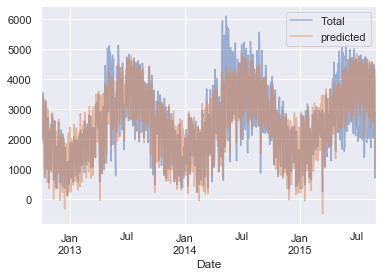

In [76]:
daily[['Total', 'predicted']].plot(alpha=0.5);

Model fits reasonably well reproducing the seasonality perfectly.

It is evident that we have missed some key features, especially during the summer time.
Either our features are not complete (i.e., people decide whether to ride to work based on more than just these) or there are some nonlinear relationships that we have failed to take into account (e.g., perhaps people ride less at both high and low temperatures).